# Name : Snehal Shyam Jagtap

## Assignment No 17



### SUPPORT VECTOR MACHINE

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Task 1: Exploratory Data Analysis (EDA)

### Step 1: Load the Mushroom dataset

In [54]:
data = pd.read_csv('mushroom.csv') 

In [55]:
data.head()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


### Step 2: Basic dataset exploration

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [57]:
data.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [58]:
data.isnull().sum()

Unnamed: 0                  0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
class                       0
stalk_height                0
cap_diameter                0
dtype: int64

### Step 3: Visualizing feature distributions

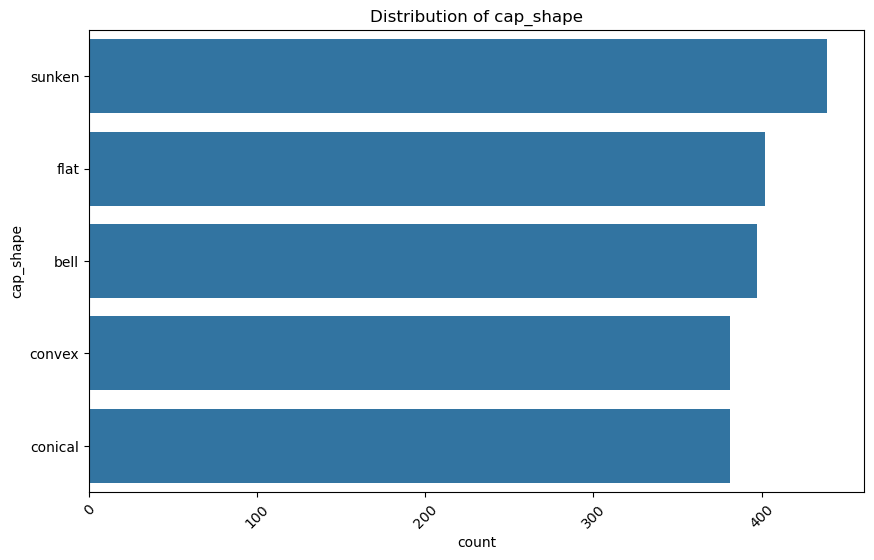

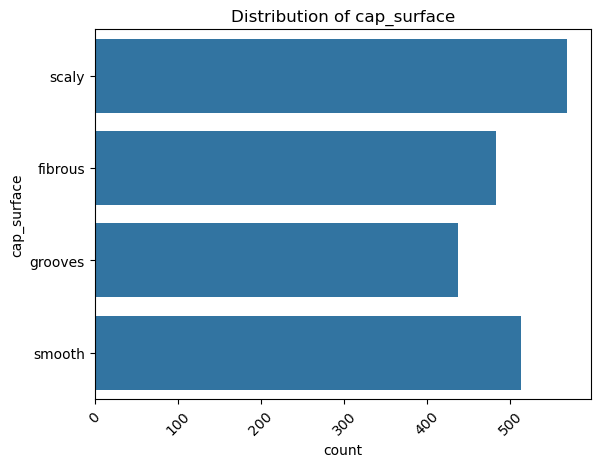

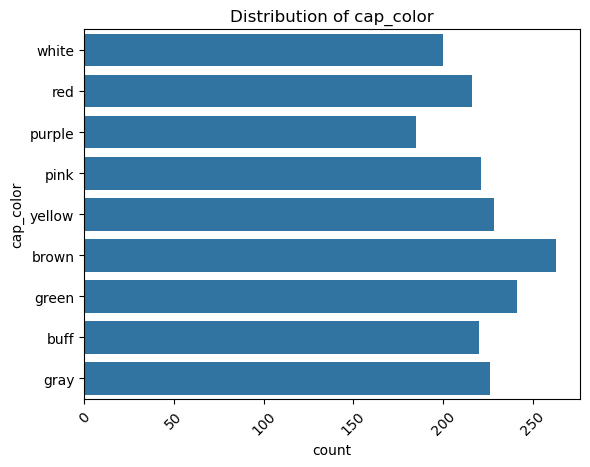

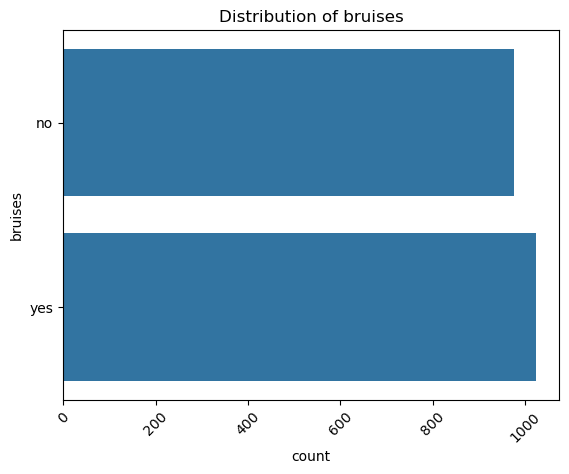

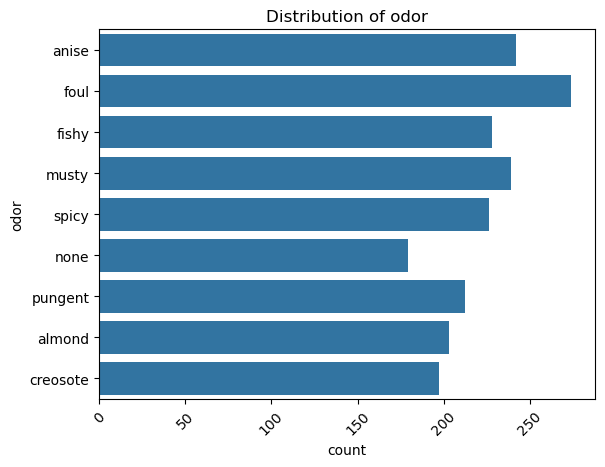

In [59]:
plt.figure(figsize=(10, 6))
for column in data.select_dtypes(include=['object']).columns[:5]:
    sns.countplot(data[column])
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

### Step 4: Investigate feature correlations

In [60]:
encoded_data = data.apply(LabelEncoder().fit_transform)
correlation_matrix = encoded_data.corr()

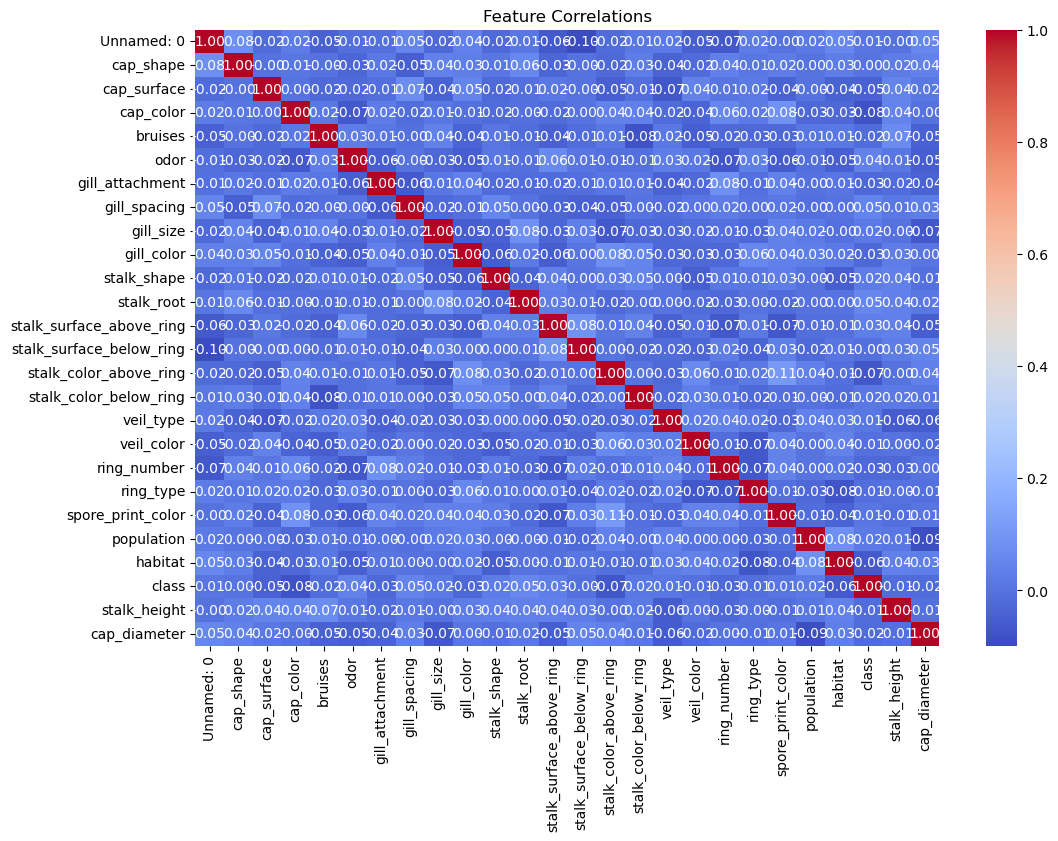

In [61]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlations")
plt.show()

# Task 2: Data Preprocessing

### Step 1: Encode categorical variables

In [62]:
label_encoder = LabelEncoder()
for col in data.columns:
    data[col] = label_encoder.fit_transform(data[col])

In [63]:
X = data.drop('class', axis=1)  
y = data['class']

In [64]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Task 3: Data Visualization


### Class distribution


In [ ]:
sns.countplot(y)
plt.title("Class Distribution")
plt.show()

In [ ]:
X_np = X.to_numpy()  # Convert DataFrame to NumPy array
sns.scatterplot(x=X_np[:, 0], y=X_np[:, 1], hue=y, palette='viridis')
plt.title("Scatter Plot of Two Features")
plt.show()

# Task 4: SVM Implementation

### Step 1: Initialize SVM model



In [ ]:
svm_model = SVC(kernel='linear', C=1)

### Step 2: Train the SVM classifier


In [ ]:
svm_model.fit(X_train, y_train)

### Step 3: Evaluate model performance

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Task 5: Visualization of SVM Results

In [ ]:
from matplotlib.colors import ListedColormap

In [ ]:
def plot_decision_boundary(X, y, model):
    X_set, y_set = X, y
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title('SVM Decision Boundary')
    plt.legend()
    plt.show()

# Task 6: Parameter Tuning and Optimization

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    model = SVC(kernel=kernel, C=1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\nKernel: {kernel}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    print(classification_report(y_test, y_pred))


# Task 7: Comparison and Analysis

In [ ]:
print("\nAnalysis:")
print("- Linear kernel performs well for linearly separable data.")
print("- RBF kernel is flexible and adapts well to non-linear data.")
print("- Polynomial kernel is useful when there are polynomial relationships.")
print("- Sigmoid kernel is less commonly used but works in some cases.")